In [1]:
""" 
Image classification for loss run reports, emails, letters and NPDB formats.

This code uses different type of parameters like image similarity, context in the OCR, and text density in ortder to 
classify the diferents pdf formats

@author: Eduardo Santos, Alberto de Obesso, Romulo Troncoso
"""

# load dependencies
import cv2
import os
import numpy as np
import scipy
import lossrun
import matplotlib.pyplot as plt

In [2]:
# Run this to update the pdf files to process

# transform NPDB data
lossrun.transform_to_images_an_entire_folder(pdfs_folder='./temporal/emails/pdfs/', images_folder='./temporal/emails/images/', format='.png', log_file='log_file.txt')

lossrun.transform_to_text_an_entire_folder(images_folder='./temporal/emails/images/', text_folder= './temporal/emails/text/ ', log_file='log_file.txt')
#template_1 = cv2.imread(, cv2.IMREAD_GRAYSCALE)

True

|## Clasify files acording keywords ##

In [13]:
PATH = './temporal/emails/text/'

for i in os.listdir(PATH):
    listw = lossrun.read_dict(PATH + i)
    content =' '.join(listw['text'])
    if ('FROM:'in content.upper()) and ('SENT:'in content.upper()) and ('@' in content.upper()):
        print ('email: founded: ', i)
    if  'NPDB' in content.upper():
        print ('NPDB format: founded: ', i)


email: founded:  Email from Ashley to decline due to losses.txt
email: founded:   No losses for prior owners 7-10-18 license and inspection can be submitted after licensing process is complete.txt


## Found logos or ROIs in images by OCR size ## 

In [14]:
# found carrier logo
image_path = os.path.join('.','data','txt','s')

txt_dict = lossrun.read_dict('./data/txt/MM20182493 loss runs CAP-YES.txt')

area, _index = [], []
for i in range (len(txt_dict['text'])):
    if txt_dict['text'][i] != '' and txt_dict['text'][i] != ' ':
    
        area.append(txt_dict['height'][i])
        _index.append(i)


In [203]:
image = cv2.imread('./data/images/MM20182493 loss runs CAP-YES.png',cv2.IMREAD_GRAYSCALE)
#cv2.rectangle(image, ())

for i in range (len(area)):
    if txt_dict['height'][i] > np.ceil(np.mean(area)+20) and(txt_dict['text'][i]!= '') and (txt_dict['text'][i]!= ' '):
        x_1 = txt_dict['left'][i]
        x_2 = txt_dict['left'][i] + txt_dict['width'][i]
        y_1 = txt_dict['top'][i]
        y_2 = txt_dict['top'][i] + txt_dict['height'][i]
        cv2.rectangle(image, (x_1, y_1),(x_2, y_2),(0,0,255), 5)
        print(txt_dict['text'][i])


4
CapSpecialty


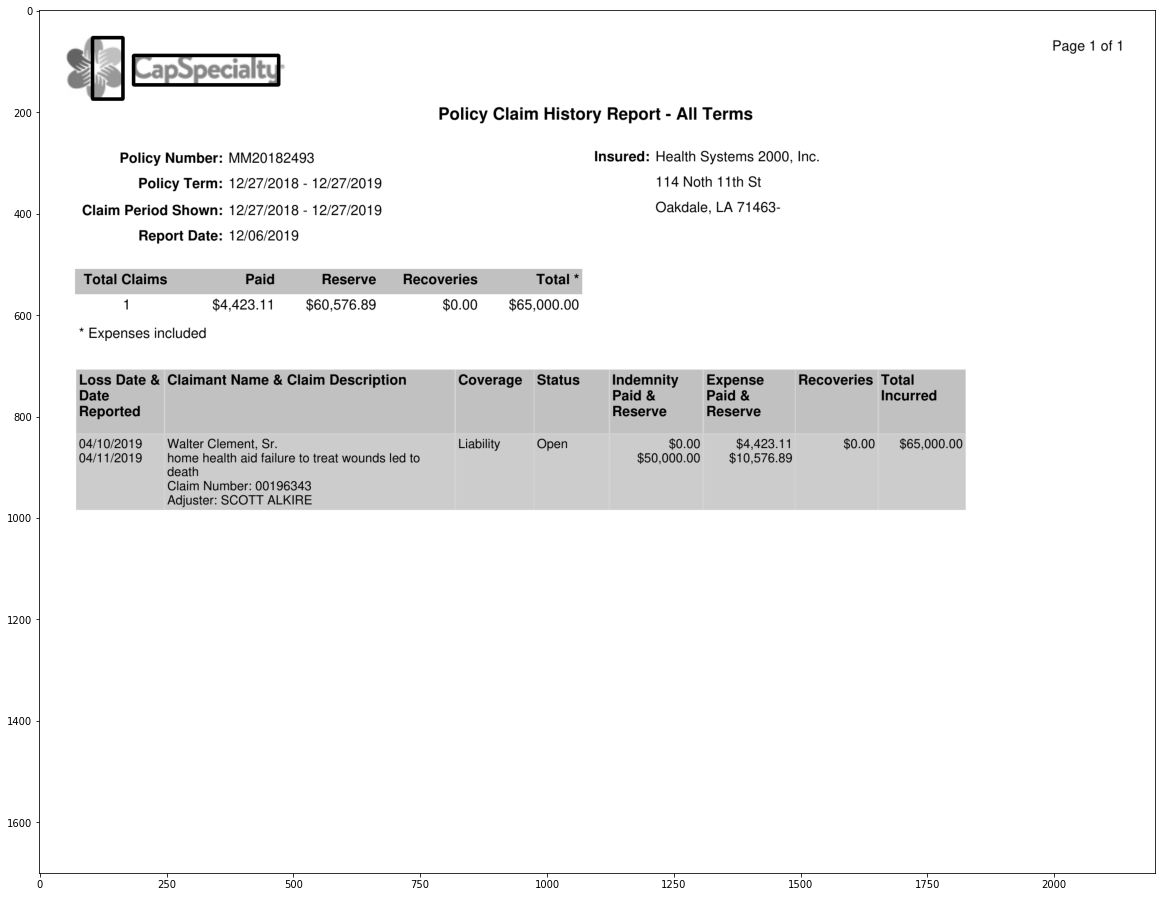

In [204]:
plt.figure(figsize=(20,20))
plt.imshow(image, cmap = 'gray')

## Find logos by contour analisis

In [235]:
# counter
image = cv2.imread('./data/images/MM20182493 loss runs CAP-YES.png',cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(image, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(thresh, [c], -1, 0, -1)

invert = 255 - thresh

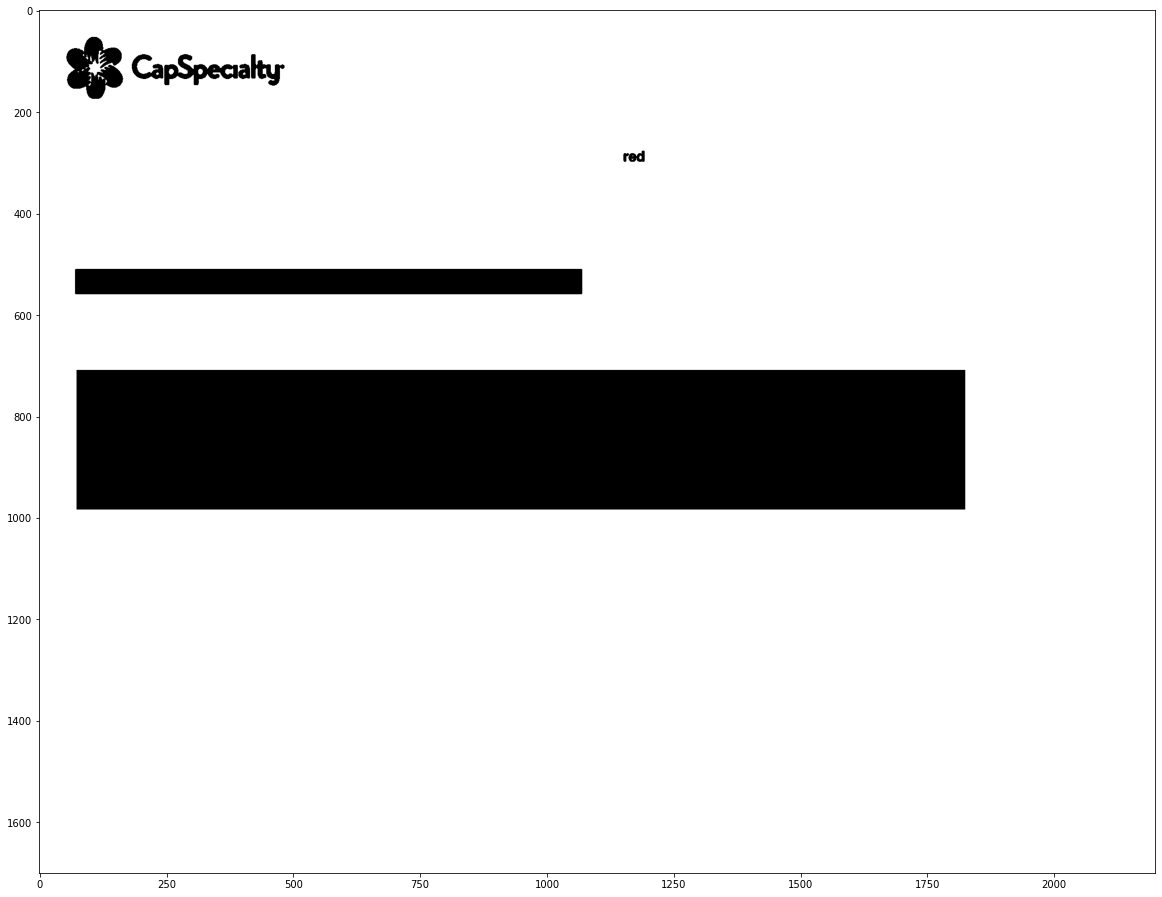

In [236]:
plt.figure(figsize=(20,20))
plt.imshow(invert, cmap = 'gray')